In [60]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [61]:
# Load the secrets api key
with open('secrets_file.json', 'r') as f:
    secrets = json.load(f)
    
api_key = secrets['api_key'] #you can hardcode your value here if you want

In [62]:
# class that will interact with the FRED API
class FredPy:
    def __init__(self, token=None):
        self.token = token
        self.url = "https://api.stlouisfed.org/fred/series/observations"  + \
                    "?series_id={seriesID}&api_key={key}&file_type=json" + \
                    "&observation_start={start}&observation_end={end}&units={units}"
        
    def set_token(self, token):
        self.token = token
    
    def get_series(self, seriesID, start, end, units):
        # the url string with the values inserted into it
        url_formatted = self.url.format(
            seriesID=seriesID, start=start, end=end, units=units, key=self.token
        )
                       
        response = requests.get(url_formatted)
        
        if(self.token):
            # If the response was successful, extract the data from it
            if(response.status_code == 200):
                    data = pd.DataFrame(response.json()['observations'])[['date', 'value']]\
                            .assign(date = lambda cols: pd.to_datetime(cols['date']))\
                            .assign(value = lambda cols: cols['value'].astype(float))\
                            .rename(columns = {'value': seriesID})
                            
                    return data
                
            else:
                    raise Exception("Bad response from API, status code = {}".format(response.status_code))
        else:
            raise Exception("You did not specify an API key.")

In [63]:
# Instantiate Fredpy object
fredpy = FredPy()

# set the API KEY
fredpy.set_token(api_key)

# Test getting the GDP series
gdp_data = fredpy.get_series(
    seriesID = 'GDP',
    start = '2005-01-01',
    end = '2021-12-01',
    units = 'pc1'
)

In [64]:
# Let's get the unemployment rate data
unemployment_data = fredpy.get_series(
    seriesID = 'UNRATE',
    start = '2005-01-01',
    end = '2021-12-01',
    units = 'lin'
)


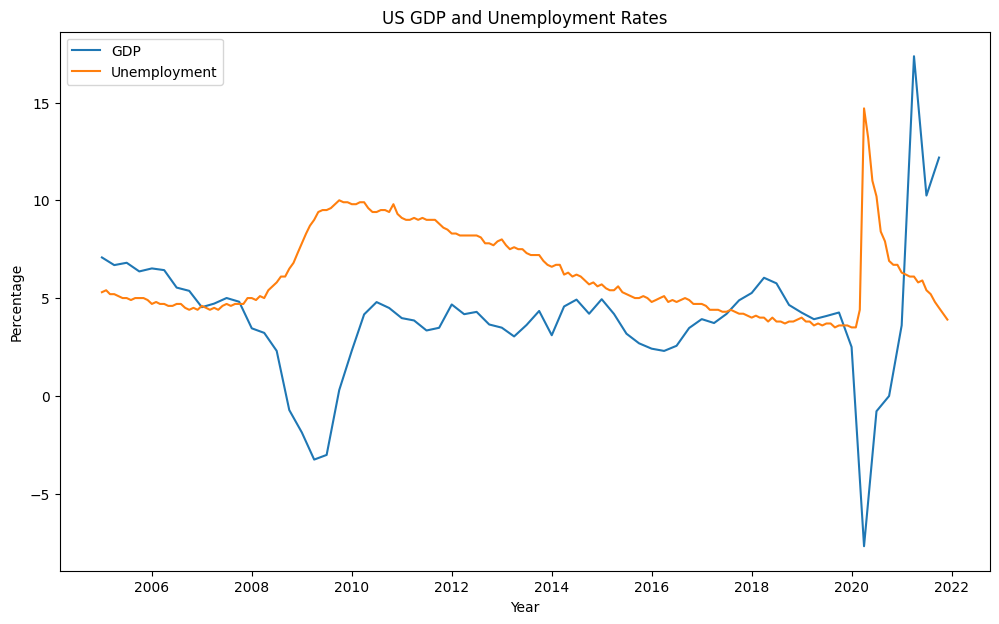

In [67]:
# Visualize the series
plt.figure(figsize=(12, 7))
plt.plot(gdp_data['date'], gdp_data['GDP'], label='GDP')
plt.plot(unemployment_data['date'], unemployment_data['UNRATE'], label='Unemployment') # corrected line
plt.legend()
plt.title('US GDP and Unemployment Rates')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.show()
